# Loan Approval Prediction

## EDA-Exploratory Data Analysis

In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import learning_curve
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.tree import export_graphviz
import graphviz 


In [9]:
# Load the dataset into a Pandas dataframe
df = pd.read_csv('Loan_Approval_Dataset.csv')
df.head()

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected


In [10]:
# Print out the basic info of the dataset to vew datatypes, column names, and non-null counts
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4269 entries, 0 to 4268
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   loan_id                    4269 non-null   int64 
 1    no_of_dependents          4269 non-null   int64 
 2    education                 4269 non-null   object
 3    self_employed             4269 non-null   object
 4    income_annum              4269 non-null   int64 
 5    loan_amount               4269 non-null   int64 
 6    loan_term                 4269 non-null   int64 
 7    cibil_score               4269 non-null   int64 
 8    residential_assets_value  4269 non-null   int64 
 9    commercial_assets_value   4269 non-null   int64 
 10   luxury_assets_value       4269 non-null   int64 
 11   bank_asset_value          4269 non-null   int64 
 12   loan_status               4269 non-null   object
dtypes: int64(10), object(3)
memory usage: 433.7+ KB
None


In [11]:
# Print out column names. Notice the leading spaces. We want to remove these
print(df.columns)

Index(['loan_id', ' no_of_dependents', ' education', ' self_employed',
       ' income_annum', ' loan_amount', ' loan_term', ' cibil_score',
       ' residential_assets_value', ' commercial_assets_value',
       ' luxury_assets_value', ' bank_asset_value', ' loan_status'],
      dtype='object')


In [12]:
# Drop loan_id as it is a duplicate indicator
del df['loan_id']

In [13]:
# Edit all columns to remove the spaces in front of the column name (and behind if there are any)
df.columns = df.columns.str.strip()

# Check to make sure it worked properly
print(df.columns)

Index(['no_of_dependents', 'education', 'self_employed', 'income_annum',
       'loan_amount', 'loan_term', 'cibil_score', 'residential_assets_value',
       'commercial_assets_value', 'luxury_assets_value', 'bank_asset_value',
       'loan_status'],
      dtype='object')


In [14]:
# Clean entire columns to remove leading and trailing blank spaces for non-numerical columns

# List of columns to be cleaned
columns_to_clean = ['education', 'self_employed', 'loan_status']

# Loop through each column and strip spaces
for col in columns_to_clean:
    df[col] = df[col].str.strip()

In [15]:
# Make sure all desired changes were made
df.head()

,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected


In [16]:
# Checking for missing values
print(df.isnull().sum())

no_of_dependents            0
education                   0
self_employed               0
income_annum                0
loan_amount                 0
loan_term                   0
cibil_score                 0
residential_assets_value    0
commercial_assets_value     0
luxury_assets_value         0
bank_asset_value            0
loan_status                 0
dtype: int64


## Analysis and Visualizations

In [17]:
# Run a statistical summary on all columns of the dataframe to get an 
# overall understanding of the data before graphing
print(df.describe())

       no_of_dependents  income_annum   loan_amount    loan_term  cibil_score  \
count       4269.000000  4.269000e+03  4.269000e+03  4269.000000  4269.000000   
mean           2.498712  5.059124e+06  1.513345e+07    10.900445   599.936051   
std            1.695910  2.806840e+06  9.043363e+06     5.709187   172.430401   
min            0.000000  2.000000e+05  3.000000e+05     2.000000   300.000000   
25%            1.000000  2.700000e+06  7.700000e+06     6.000000   453.000000   
50%            3.000000  5.100000e+06  1.450000e+07    10.000000   600.000000   
75%            4.000000  7.500000e+06  2.150000e+07    16.000000   748.000000   
max            5.000000  9.900000e+06  3.950000e+07    20.000000   900.000000   

       residential_assets_value  commercial_assets_value  luxury_assets_value  \
count              4.269000e+03             4.269000e+03         4.269000e+03   
mean               7.472617e+06             4.973155e+06         1.512631e+07   
std                6.503637

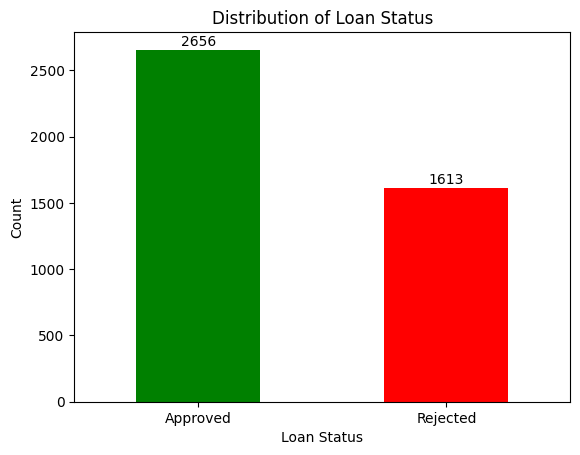

In [18]:
# Graph an overall view of loans approved vs loans denied by count

# Count the occurrences of each class in 'loan_status'
loan_status_counts = df['loan_status'].value_counts()

# Define custom colors for the bars
colors = ['green', 'red']

# Create a bar plot
ax = loan_status_counts.plot(kind='bar', color=colors)

# Adding labels and title
plt.xlabel('Loan Status')
plt.xticks(rotation=0)
plt.ylabel('Count')
plt.title('Distribution of Loan Status')

# Add value counts on top of the bars
for i, v in enumerate(loan_status_counts):
    ax.text(i, v + 10, str(v), ha='center', va='bottom')

# Show the plot
plt.show()

From this simple snapshot of the data, we can learn a lot.  We can see that there are more approved loans than rejected loans, but not to the point that it should concern us about the quality of the data or a potential large imbalance in the data.  We can also see that there are 2,656 applicants in the approved loan status, which is what our target variable is going to be.  

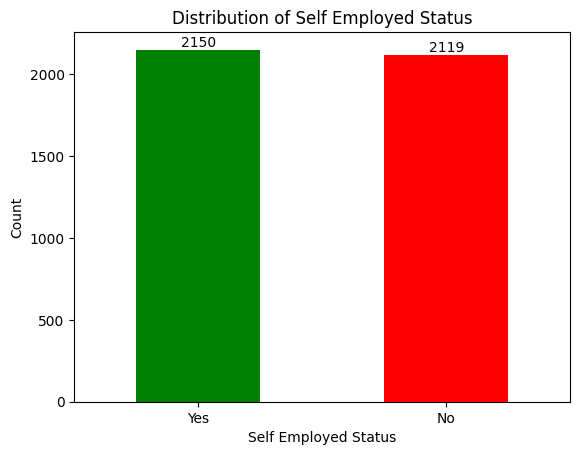

In [19]:
# Graph an overall view of self-employment status by count

# Count the occurrences of each class in 'education'
self_employed_status_counts = df['self_employed'].value_counts()

# Define custom colors for the bars
colors = ['green', 'red']

# Create a bar plot
ax = self_employed_status_counts.plot(kind='bar', color=colors)

# Adding labels and title
plt.xlabel('Self Employed Status')
plt.xticks(rotation=0)
plt.ylabel('Count')
plt.title('Distribution of Self Employed Status')

# Add counts on top of the bars
for i, count in enumerate(self_employed_status_counts):
    ax.text(i, count, str(count), ha='center', va='bottom')

# Show the plot
plt.show()

We can see that almost an equal number of loan applicants are self-employed to those that are not self-employed.  

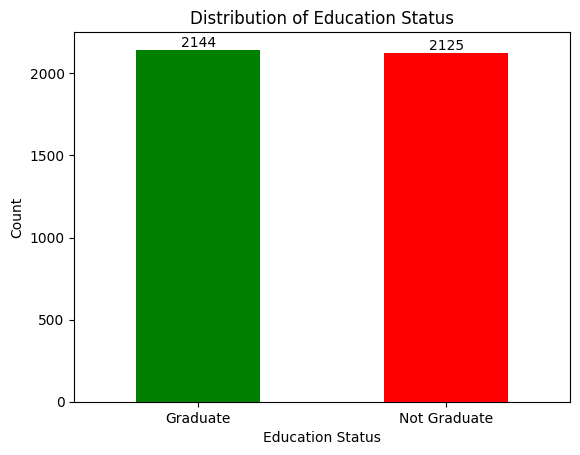

In [20]:
# Graph an overall view of the education status by count

# Count the occurrences of each class in 'education'
education_status_counts = df['education'].value_counts()

# Define custom colors for the bars
colors = ['green', 'red']

# Create a bar plot
ax = education_status_counts.plot(kind='bar', color=colors)

# Adding labels and title
plt.xlabel('Education Status')
plt.xticks(rotation=0)
plt.ylabel('Count')
plt.title('Distribution of Education Status')

# Add counts on top of the bars
for i, count in enumerate(education_status_counts):
    ax.text(i, count, str(count), ha='center', va='bottom')

# Show the plot
plt.show()

About an equal number of applicants graduated as those who did not graduate. This graph is extremely helpful to see if there is a large imbalance in the number of graduates versus non graduates.  

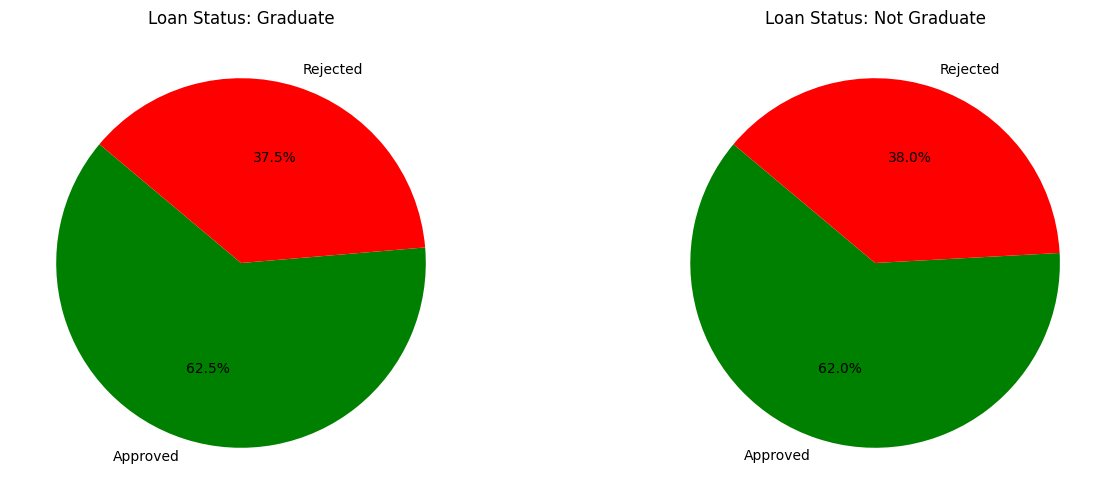

In [21]:
# Look at percentage of loan approval and rejections based on education level (graduated vs. not graduated)

# Group the data by 'Education' and 'Loan_Status' columns
approval_by_education = df.groupby(['education', 'loan_status']).size().unstack(fill_value=0)

# Define colors for the pie chart
colors = ['green', 'red']

# Create a figure with subplots
fig, axs = plt.subplots(1, approval_by_education.shape[0], figsize=(15, 6))

# Loop through each education category to create a pie chart
for i, (education, counts) in enumerate(approval_by_education.iterrows()):
    axs[i].pie(counts, labels=counts.index, autopct='%1.1f%%', startangle=140, colors=colors)
    axs[i].set_title(f'Loan Status: {education}')

# Display the figure
plt.show()

This visualization helps in understanding the influence of educational background on loan approval decisions. Both graphs are extremely similar in terms of percentage approved and rejected for both education levels, suggesting that educational background may not be a significant predictor in the loan approval process for our dataset.  

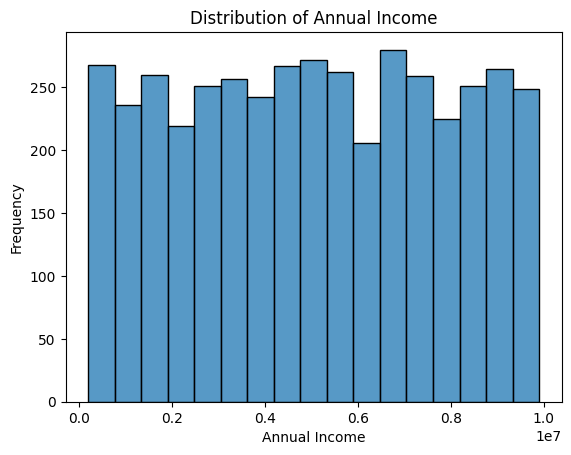

In [22]:
# Look at the distribution of annual income by how frequently various annual incomes occur within the dataset

# Distribution of annual income
sns.histplot(df['income_annum'])

# Set the labels and title using matplotlib functions
plt.xlabel('Annual Income')
plt.ylabel('Frequency')
plt.title('Distribution of Annual Income')

# Display the plot
plt.show()

The annual income distribution is not skewed in any particular way, indicating that all values of annual income have applied for loans.

C:\Users\alici\AppData\Local\Temp\ipykernel_15004\169394868.py:11: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_data = df.groupby(['cibil_score_bins', 'loan_status']).size().unstack(fill_value=0)


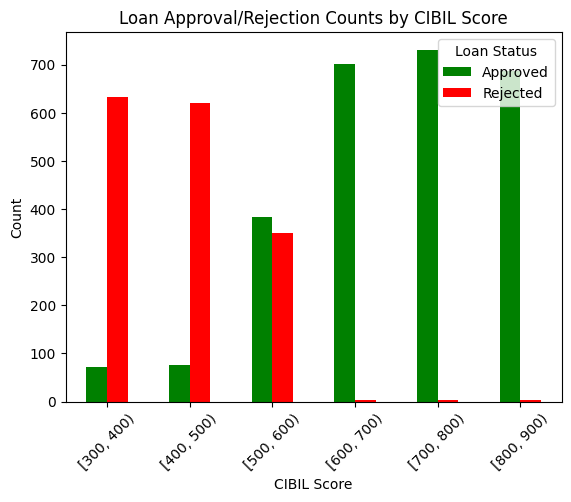

In [23]:
# Look at loan approval/rejection status based on CIBIL score, keeping in mind that 
# CIBIL scores can be anywhere between 300 and 900, with higher scores being more desireable

# Define bins for CIBIL score
bins = np.arange(300, 901, 100)  # Bins from 300 to 900, every 100 points

# Create a new column for the CIBIL score bins
df['cibil_score_bins'] = pd.cut(df['cibil_score'], bins=bins, right=False)

# Group by bins and loan status, then count occurrences
grouped_data = df.groupby(['cibil_score_bins', 'loan_status']).size().unstack(fill_value=0)

# Define colors for each loan status
color_mapping = {'Approved': 'green', 'Rejected': 'red'}
colors = [color_mapping.get(status, 'blue') for status in grouped_data.columns]

# Plotting
grouped_data.plot(kind='bar', stacked=False, color=colors)

plt.xlabel('CIBIL Score')
plt.ylabel('Count')
plt.title('Loan Approval/Rejection Counts by CIBIL Score')
plt.xticks(rotation=45)
plt.legend(title='Loan Status')

plt.show()

This graph shows the number of approved and rejected loans at a range of CIBIL scores.  As we can see, the lower CIBIL scores have much higher rejection counts than the higher CIBIL scores.  This makes sense, as higher CIBIL scores tend to indicate more financial stability in an applicant. 

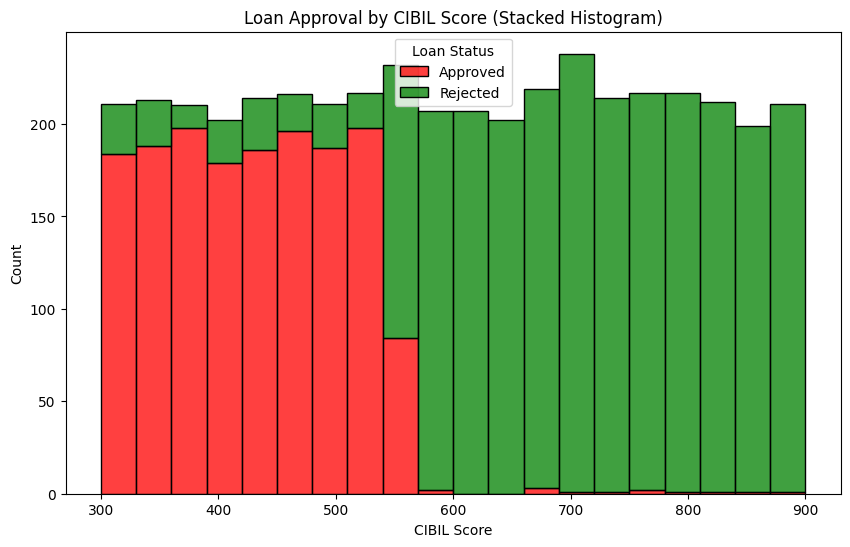

In [24]:
# Create a histogram to visualize whether a loan was approved or rejected based on CIBIL score

# Set figure size
plt.figure(figsize=(10, 6))

# Define your color palette
color_palette = {"Approved": "green", "Rejected": "red"}

# Create histogram
ax = sns.histplot(data=df, x='cibil_score', hue='loan_status', bins=20, multiple='stack', palette=color_palette)

plt.title('Loan Approval by CIBIL Score (Stacked Histogram)')
plt.xlabel('CIBIL Score')
plt.ylabel('Count')

# Explicitly add legend
ax.legend(title='Loan Status', labels=['Approved', 'Rejected'])

plt.show()

This histogram is an effective way to analyze how the likelihood of loan approval varies with different CIBIL scores, highlighting the importance of credit scores in loan decision-making processes. As we can see there are a higher number of accepted loans as the CIBIL score increases.

### Check for outliers in numerical columns

In [25]:
# Function to detect outliers using IQR method
def detect_outliers_iqr(column):
    if column.dtype in ['int64', 'float64']:
        Q1 = column.quantile(0.25)
        Q3 = column.quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        outliers = (column < lower_bound) | (column > upper_bound)
        return outliers
    else:
        return pd.Series(False, index=column.index)

# Check for outliers in each numeric column of the DataFrame
numeric_columns = df.select_dtypes(include=['int64', 'float64'])
outliers_dict = {}

for column in numeric_columns.columns:
    outliers = detect_outliers_iqr(numeric_columns[column])
    outliers_dict[column] = sum(outliers)

print("Number of outliers in each numeric column:")
print(outliers_dict)

Number of outliers in each numeric column:
{'no_of_dependents': 0, 'income_annum': 0, 'loan_amount': 0, 'loan_term': 0, 'cibil_score': 0, 'residential_assets_value': 52, 'commercial_assets_value': 37, 'luxury_assets_value': 0, 'bank_asset_value': 5}


### Create box and whisker plots for numerical variables with outliers to visualize

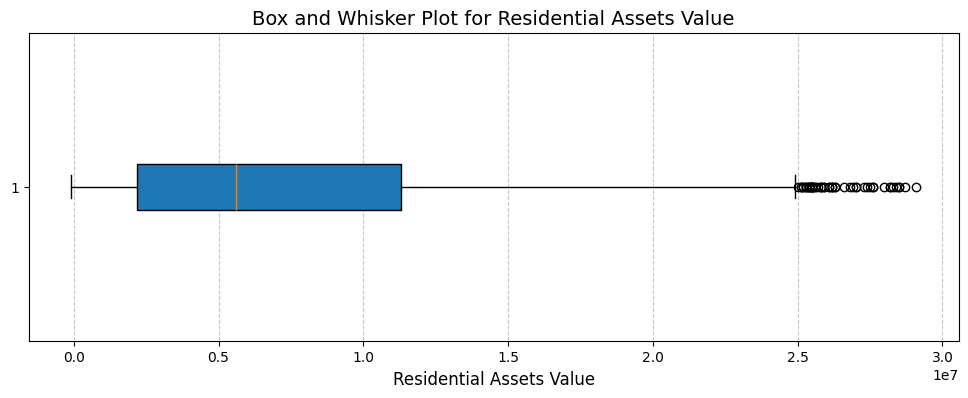

In [26]:
# Create a box and whisker plot for 'residential_assets_value'
plt.figure(figsize=(12, 4))  # Set the figure size
plt.boxplot(df['residential_assets_value'], vert=False, patch_artist=True)

# Customizations
colors = ['lightblue']  # Color for the boxes
plt.gca().get_xaxis().tick_bottom()
plt.gca().get_yaxis().tick_left()
plt.grid(axis='x', linestyle='--', alpha=0.7)  # Add grid lines
plt.xlabel('Residential Assets Value', fontsize=12)
plt.title('Box and Whisker Plot for Residential Assets Value', fontsize=14)

plt.show()

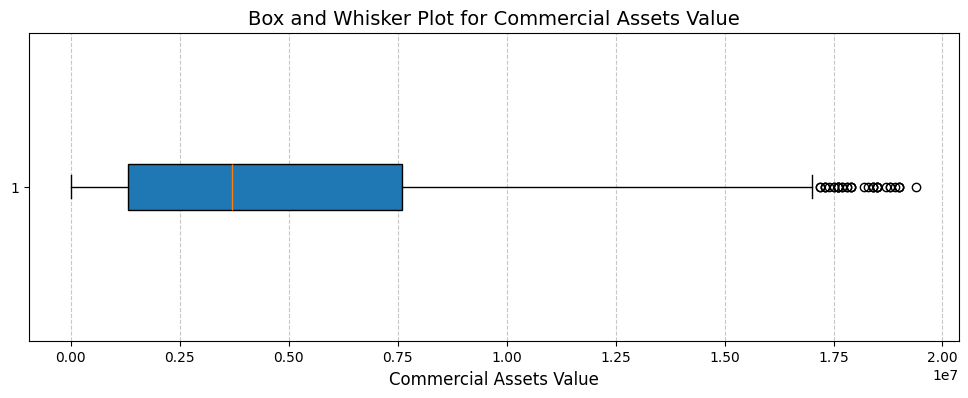

In [27]:
# Create a box and whisker plot for 'commercial_assets_value'
plt.figure(figsize=(12, 4))  # Set the figure size
plt.boxplot(df['commercial_assets_value'], vert=False, patch_artist=True)

# Customizations
colors = ['lightblue']  # Color for the boxes
plt.gca().get_xaxis().tick_bottom()
plt.gca().get_yaxis().tick_left()
plt.grid(axis='x', linestyle='--', alpha=0.7)  # Add grid lines
plt.xlabel('Commercial Assets Value', fontsize=12)
plt.title('Box and Whisker Plot for Commercial Assets Value', fontsize=14)

plt.show()

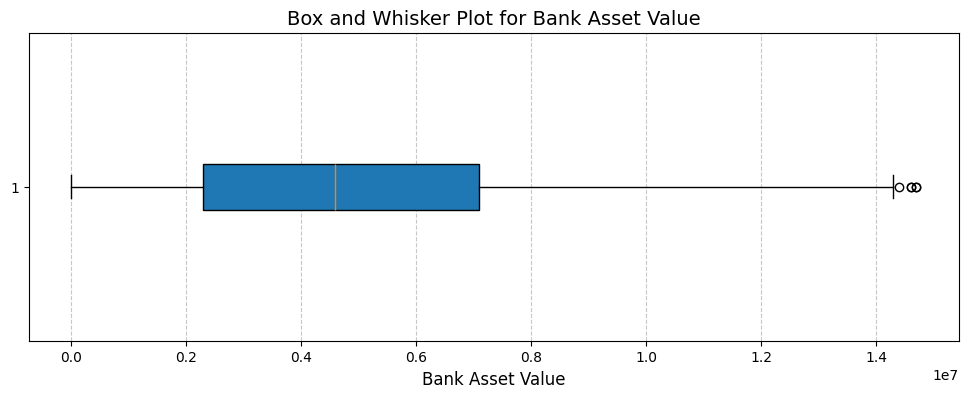

In [28]:
# Create a box and whisker plot for 'bank_asset_value'
plt.figure(figsize=(12, 4))  # Set the figure size
plt.boxplot(df['bank_asset_value'], vert=False, patch_artist=True)

# Customizations
colors = ['lightblue']  # Color for the boxes
plt.gca().get_xaxis().tick_bottom()
plt.gca().get_yaxis().tick_left()
plt.grid(axis='x', linestyle='--', alpha=0.7)  # Add grid lines
plt.xlabel('Bank Asset Value', fontsize=12)
plt.title('Box and Whisker Plot for Bank Asset Value', fontsize=14)

plt.show()

We have no reason to believe these outliers are caused by error, and may present valuable information about loan approval rates, so we will keep them in the dataset. 

# Models

## Data Preparation

In [29]:
# Convert categorical variables into dummy variables
# Define a mapping dictionary 
mappings = {
    'education': {'Graduate': 1, 'Not Graduate': 0},
    'self_employed': {'Yes': 1, 'No': 0},
    'loan_status': {'Approved': 1, 'Rejected': 0}
}

# Use a for loop to map education, self_employed, and loan_status variables to 0s and 1s
for column, mapping in mappings.items():
    df[column + '_mapped'] = df[column].map(mapping)

# Display the first few rows of the DataFrame to check the new column
df.head()

,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status,cibil_score_bins,education_mapped,self_employed_mapped,loan_status_mapped
0,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved,"[700, 800)",1,0,1
1,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected,"[400, 500)",0,1,0
2,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected,"[500, 600)",1,0,0
3,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected,"[400, 500)",1,0,0
4,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected,"[300, 400)",0,1,0


In [33]:
# Split the data into features (X) and Target (y) variables
X = df.drop(['loan_status', 'education', 'self_employed', 'loan_status_mapped', 'cibil_score_bins'], axis=1)
y = df['loan_status_mapped']  # Use mapped target column

# Grab only columns that aren't dummy variables or categorical variables
num_var = ['no_of_dependents', 'income_annum', 'loan_amount', 'loan_term', 'cibil_score', 'residential_assets_value',
           'commercial_assets_value', 'luxury_assets_value', 'bank_asset_value']

# Initialize a StandardScaler instance
scaler = StandardScaler()

# Scale the numerical variables
X[num_var] = scaler.fit_transform(X[num_var])

X.head()


,no_of_dependents,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,education_mapped,self_employed_mapped
0,-0.294102,1.617979,1.633052,0.192617,1.032792,-0.780058,2.877289,0.832028,0.930304,1,0
1,-1.473548,-0.341750,-0.324414,-0.508091,-1.061051,-0.733924,-0.631921,-0.694993,-0.515936,0,1
2,0.295621,1.439822,1.610933,1.594031,-0.544840,-0.057300,-0.107818,1.996520,2.407316,1,0
3,0.295621,1.119139,1.721525,-0.508091,-0.771045,1.649637,-0.381263,0.897943,0.899533,1,0
4,1.475067,1.689242,1.002681,1.594031,-1.264055,0.757724,0.735304,1.568075,0.007172,0,1


## Model 1: Logistic Regression Model

In [34]:
# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [35]:
# Create and train the logistic regression model on the scaled data
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [36]:
# Make predictions using the scaled test data
predictions = model.predict(X_test)

# Evaluate the model
print(classification_report(y_test, predictions))
print(f"Accuracy: {accuracy_score(y_test, predictions)}")

              precision    recall  f1-score   support

           0       0.88      0.86      0.87       318
           1       0.92      0.93      0.92       536

    accuracy                           0.91       854
   macro avg       0.90      0.90      0.90       854
weighted avg       0.90      0.91      0.90       854

Accuracy: 0.905152224824356


* This is a good model for our data, as it has a fairly high accuracy of 90.5%.  

- Precision and Recall:
    - For class 0 (Rejected loans), the precision is 0.88 and recall is 0.86. This means that the model is quite accurate in identifying actual rejections and not classifying too many non-rejections as rejections.
    - For class 1 (Approved loans), the precision is 0.92 and recall is 0.93, indicating the model is very effective in identifying loan approvals and has a high rate of correctly predicting actual approvals.

- F1-Score
    - The F1-scores, which are the harmonic mean of precision and recall, are also high for both classes (0.87 for Rejected and 0.92 for Approved), indicating a good balance between precision and recall.

- Macro Avg and Weighted Avg
    - The macro average (which treats both classes equally) and the weighted average (which accounts for class imbalance) are both around 0.90, indicating overall good performance across the classes.

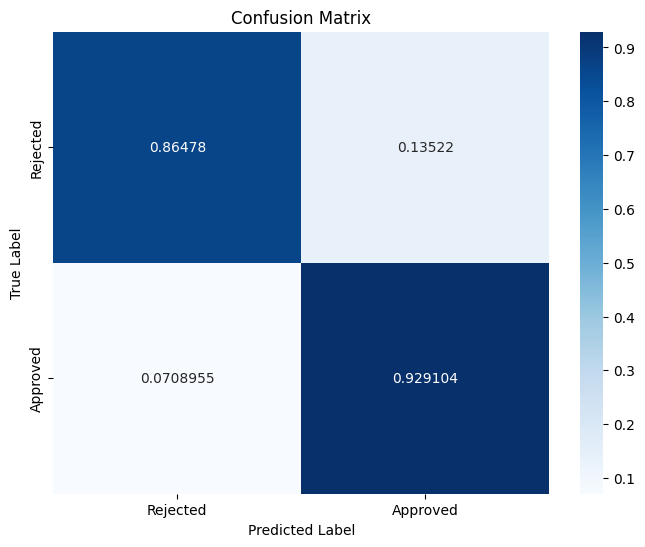

In [38]:
# Understand there are false negatives, false positives, etc.
cm_normalized = confusion_matrix(y_test, predictions, normalize = 'true')

# Plotting using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(cm_normalized, annot=True, fmt='g', cmap='Blues', xticklabels=['Rejected', 'Approved'], yticklabels=['Rejected', 'Approved'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

The confusion matrix of the logistic regression model reveals insightful details about its performance in classifying loan approvals and rejections. Specifically, it demonstrates a strong ability to correctly identify approved loans, with approximately 92.91% of the actual approved cases (class '1') being accurately predicted. In contrast, the model shows slightly less effectiveness in identifying rejected loans, with about 86.48% accuracy for the actual rejections (class '0'). The errors made by the model are relatively balanced between falsely predicting rejections as approvals (13.52%) and approvals as rejections (7.09%). This indicates that while the model is more adept at recognizing approved loans, it still maintains a respectable level of accuracy in identifying rejections, leading to an overall reliable performance in differentiating between the two loan statuses.

## Model 2: Decision Tree Model

In [39]:
# Create the Decision Tree Classifier
dtree = DecisionTreeClassifier(random_state=42)

# Train the model
dtree.fit(X_train, y_train)

# Make predictions
predictions = dtree.predict(X_test)

# Evaluate the model
print(classification_report(y_test, predictions))
print(f"Accuracy: {accuracy_score(y_test, predictions)}")


              precision    recall  f1-score   support

           0       0.97      0.96      0.97       318
           1       0.98      0.98      0.98       536

    accuracy                           0.97       854
   macro avg       0.97      0.97      0.97       854
weighted avg       0.97      0.97      0.97       854

Accuracy: 0.9742388758782201


The overall accuracy of the model is 0.974, meaning it correctly predicts the loan status 97.4% of the time.  

- Precision:
    - Precision represents the accuracy of positive predictions. For class 0 (Rejected loans), the precision is 
    0.97, meaning 97% of the instances predicted as Rejected are actually rejected. Similarly, for class 1 (Approved loans), the precision is 0.98, indicating a very high level of accuracy in predicting approvals.
- Recall
    - Recall measures the ability of the model to find all the relevant cases. For Rejected loans, the recall is 
    0.96, suggesting that the model successfully identifies 96% of all actual rejected cases. For approved loans, the recall is 0.98, meaning it identifies 98% of all actual Approved cases.
- F1-Score
    - The F1-score is a balanced measure of precision and recall. For both classes, there is an F1-score close to 0.97 and 0.98, indicating a robust balance between precision and recall.
- Macro Avg and Weighted Avg
    - The macro average (which treats both classes equally) and the weighted average (which accounts for class imbalance) are both around 0.97, indicating overall good performance across the classes.

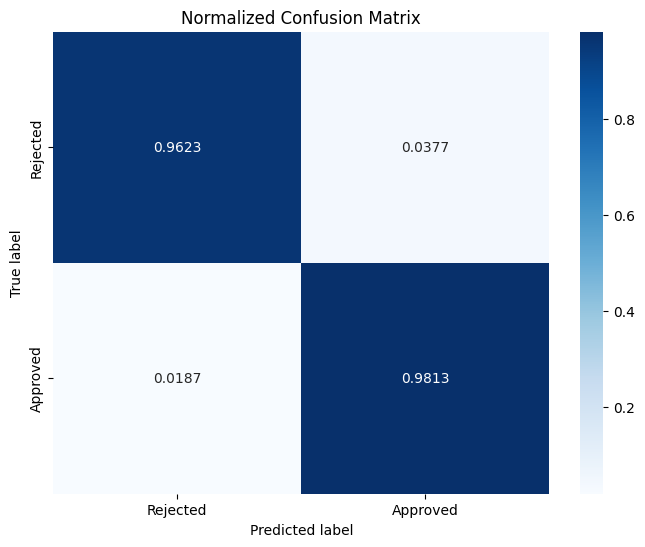

In [42]:
# Graph the confusion matrix
cm_normalized = confusion_matrix(y_test, predictions, normalize='true')

# Plotting
plt.figure(figsize=(8, 6))
sns.heatmap(cm_normalized, annot=True, fmt='.4f', cmap='Blues', xticklabels=['Rejected', 'Approved'], yticklabels=['Rejected', 'Approved'])
plt.title('Normalized Confusion Matrix')
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

The normalized confusion matrix for the decision tree model demonstrates its robust performance in classifying loan application outcomes. Specifically, the model correctly identified approximately 96.23% of the actual rejections (True Negatives) and 98.13% of the actual approvals (True Positives). This high accuracy in both dimensions indicates the model's strong predictive capability. On the flip side, the model exhibited a very low rate of misclassifications, with only about 3.77% of rejections being incorrectly predicted as approvals (False Positives) and roughly 1.87% of approvals being mistakenly predicted as rejections (False Negatives). These low misclassification rates signify the model's reliability and precision in distinguishing between approved and rejected loan applications, making it a valuable tool for making informed lending decisions.

## Model 3: Random Forest Model

In [43]:
# Create the Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [44]:
# Make predictions on the test set
rf_predictions = rf_model.predict(X_test)

# Evaluate the model
print(classification_report(y_test, rf_predictions))
print(f"Accuracy: {accuracy_score(y_test, rf_predictions)}")

              precision    recall  f1-score   support

           0       0.98      0.97      0.97       318
           1       0.98      0.99      0.98       536

    accuracy                           0.98       854
   macro avg       0.98      0.98      0.98       854
weighted avg       0.98      0.98      0.98       854

Accuracy: 0.9789227166276346


The overall accuracy of 0.9789 (or about 97.89%) indicates that the model accurately predicts the loan status in most cases, regardless of whether it is a rejection or an approval.

- Precision:
    - Precision measures the accuracy of positive predictions. For class 0 (loan rejected), the model has a precision of 0.98, meaning 98% of the instances predicted as rejections are correct. Similarly, for class 1 (loan approved), the precision is also 0.98, indicating the model is equally reliable in its approval predictions.
- Recall
    - Recall, or sensitivity, measures the ability of the model to find all the relevant cases. For class 0, the recall is 0.97, suggesting that the model correctly identifies 97% of all actual rejections. For class 1, the recall is higher at 0.99, indicating it identifies 99% of all actual approvals.
- F1-Score
    - The F1-score is a weighted average of precision and recall. For both classes, the F1-scores are high (0.97 for class 0 and 0.98 for class 1), signifying a well-balanced model in terms of precision and recall.
- Macro Avg and Weighted Avg
    - The macro average gives equal weight to each class, while the weighted average takes the imbalance of the classes into account. Both averages being around 0.98 reflect the overall high performance across classes.

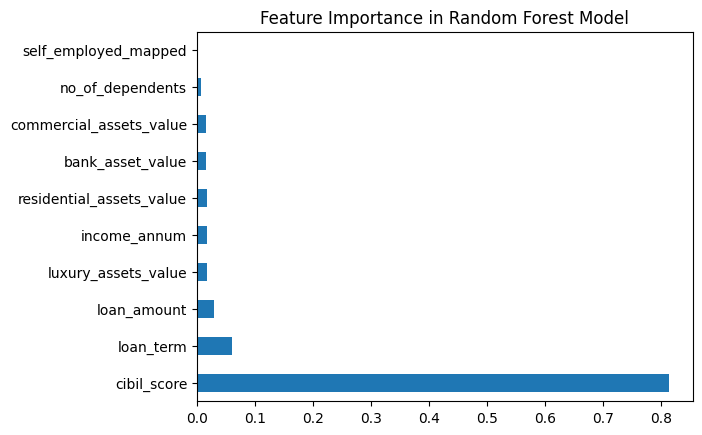

In [52]:
# Get feature importances
feature_importances = pd.Series(rf_model.feature_importances_, index=X.columns)

# Plot feature importances
feature_importances.nlargest(10).plot(kind='barh')  
plt.title('Feature Importance in Random Forest Model')
plt.show()

The CIBIL score is the most important variable effecting the model.  

Tune the model, even though the accuracy is very high.

In [53]:
# Define a parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
}

In [54]:
# Perform a grid search
# Create a Random Forest Classifier
rf = RandomForestClassifier(random_state=42)

# Create Grid Search object
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)

# Fit Grid Search to the data
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 36 candidates, totalling 180 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [10, 20, 30, None],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300]},
             verbose=2)

In [50]:
# Evaluate the best model
# Best hyperparameters
best_params = grid_search.best_params_
print(f"Best parameters: {best_params}")

# Best model
best_rf = grid_search.best_estimator_

# Evaluate the best model
best_predictions = best_rf.predict(X_test)
print(classification_report(y_test, best_predictions))
print(f"Accuracy: {accuracy_score(y_test, best_predictions)}")

Best parameters: {'max_depth': 10, 'min_samples_split': 5, 'n_estimators': 200}
              precision    recall  f1-score   support

           0       0.98      0.97      0.97       318
           1       0.98      0.99      0.98       536

    accuracy                           0.98       854
   macro avg       0.98      0.98      0.98       854
weighted avg       0.98      0.98      0.98       854

Accuracy: 0.9789227166276346


An overall accuracy of 0.98 (or 98%) demonstrates that the model is highly accurate in predicting the correct loan status across both classes.

- Precision:
    - The precision for class 0 (loan rejections) is 0.98, indicating that 98% of loans predicted as rejections are indeed rejections. For class 1 (loan approvals), the precision is also 0.98, which means 98% of loans predicted as approvals are correctly identified. This shows high accuracy in the model's predictions.
- Recall
    - The recall for class 0 is 0.97, suggesting that the model correctly identifies 97% of all actual rejections. The recall for class 1 is even higher at 0.99, meaning the model identifies 99% of all actual approvals. This indicates the model is highly sensitive and effective in identifying both loan rejections and approvals.
- F1-Score
    - The F1-score, which balances precision and recall, is 0.97 for rejections and 0.98 for approvals, indicating strong predictive performance for both classes.
- Macro Avg and Weighted Avg
    - Both the macro and weighted averages are around 0.98, reflecting the model's consistent and high performance across both classes.

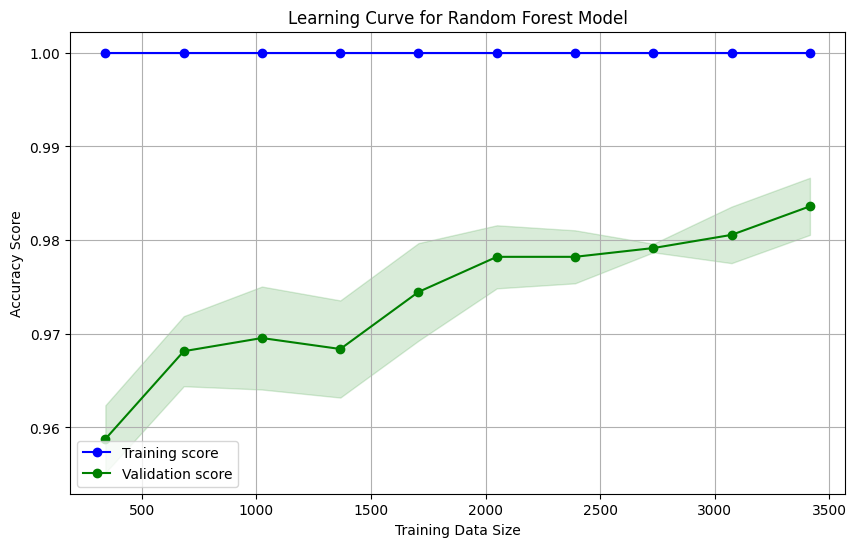

In [51]:
# Create a graph of the learning curve of the Random Forest Model
# Initialize Random Forest model
model_rf_graph = RandomForestClassifier(n_estimators=200, random_state=42)

# Define training sizes
train_sizes = np.linspace(0.1, 1.0, 10)

# Compute the learning curve
train_sizes, train_scores, validation_scores = learning_curve(model_rf_graph, X, y, train_sizes=train_sizes, cv=5, scoring='accuracy')

# Calculate mean and standard deviation for training set scores
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)

# Calculate mean and standard deviation for validation set scores
validation_mean = np.mean(validation_scores, axis=1)
validation_std = np.std(validation_scores, axis=1)

# Plot the learning curve
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_mean, label='Training score', color='blue', marker='o')
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color='blue', alpha=0.15)

plt.plot(train_sizes, validation_mean, label='Validation score', color='green', marker='o')
plt.fill_between(train_sizes, validation_mean - validation_std, validation_mean + validation_std, color='green', alpha=0.15)

plt.title('Learning Curve for Random Forest Model')
plt.xlabel('Training Data Size')
plt.ylabel('Accuracy Score')
plt.legend(loc='best')
plt.grid()
plt.show()

Note that as training size increases, validation score also trends upward.  However, training score hovers around 1. This could be for many reasons, the main one being that the model may show high variance or high bias.  

[[0.96540881 0.03459119]
 [0.0130597  0.9869403 ]]


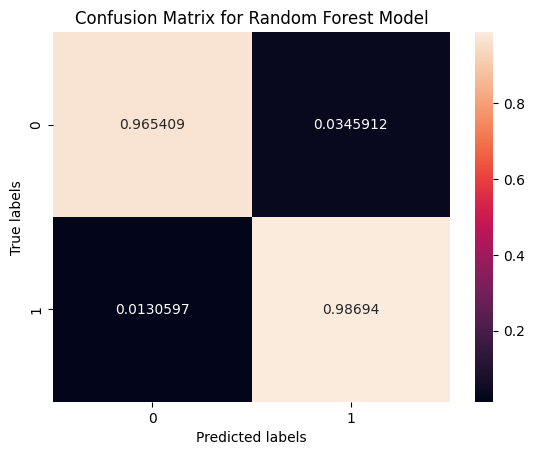

In [55]:
# Create a confusion matrix for the Random Forest model
predictions_rf = best_rf.predict(X_test)
cm_rf_normalized = confusion_matrix(y_test, predictions_rf, normalize='true')

# Display the confusion matrix
print(cm_rf_normalized)

sns.heatmap(cm_rf_normalized, annot=True, fmt='g')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix for Random Forest Model')
plt.show()

The normalized confusion matrix for the Random Forest model reveals a high degree of accuracy in predicting loan approvals and rejections. Approximately 96.54% of loan applications that were actually rejected were correctly identified by the model as rejections (True Negative Rate), indicating a strong ability to correctly classify rejected loans. On the other hand, only about 3.46% of the applications were incorrectly classified as approvals when they were actually rejections (False Positive Rate), showing a low rate of error in this aspect. For the approved loans, the model demonstrated a similarly strong performance. It correctly identified about 98.69% of the actual approvals (True Positive Rate), while only misclassifying 1.3% of them as rejections (False Negative Rate). This high accuracy in identifying both approved and rejected loans with minimal errors signifies the effectiveness of the model in distinguishing between the two categories, making it a reliable tool for loan approval prediction.

## Most Accurate Model: Tuned Random Forest Model
### Evaluations/Interpretations

The Tuned Random Forest Model had the highest accuracy of the three models at 97.89%. This answers the research question as to whether or not we can predict loan approval determination with high accuracy.  The Tuned Random Forest Model correctly predicted 97.89% of the correct loan status across both classes (both accepted and rejected loans).  Although we already looked at the accuracy, precision, recall, and f1-scores above, it's important to take a look at these statistics again (see below).  These scores suggest that the model is effective at predicting loan approval status with mininimal error rates.  The high performance across all metrics suggests the model is well-tuned, making it reliable for predicting loan outcomes based on the dataset's features.

In [59]:
# Evaluate the best model
best_predictions = best_rf.predict(X_test)
print(classification_report(y_test, best_predictions))
print(f"Accuracy: {accuracy_score(y_test, best_predictions)}")

              precision    recall  f1-score   support

           0       0.98      0.97      0.97       318
           1       0.98      0.99      0.98       536

    accuracy                           0.98       854
   macro avg       0.98      0.98      0.98       854
weighted avg       0.98      0.98      0.98       854

Accuracy: 0.9789227166276346


To answer the other research questions, we can look at the feature importances graph below:

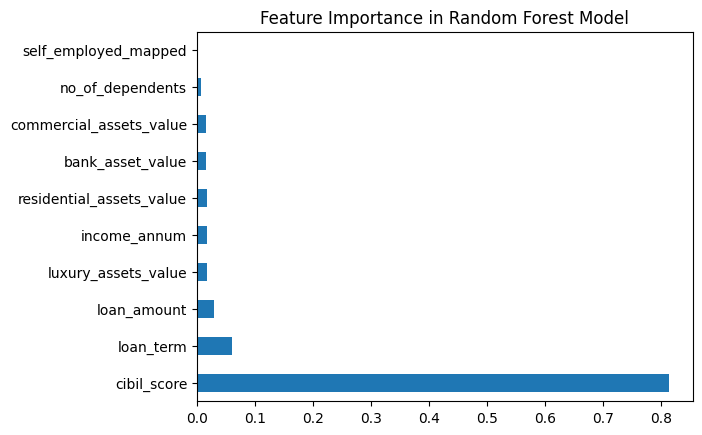

In [57]:
# Get feature importances
feature_importances = pd.Series(rf_model.feature_importances_, index=X.columns)

# Plot feature importances
feature_importances.nlargest(10).plot(kind='barh')  
plt.title('Feature Importance in Random Forest Model')
plt.show()

One of the research questions was what kind of role (if any) self employment played in the loan approval decision. Self employment doesn't contribute to the model's predictions or decision making process.  This suggests that self employment does not significatly contribute to predicting the loan application status (approved or rejected) in this tuned Random Forest Model.  It was also questioned whether credit score impacts the loan approval decision process.  It is apparent that credit score (or cibil_score on the graph) is a very important feature in this model.  This suggests that it is very significantly contributes to predicting loan application status.  We can also see that loan term and loan amount countribute far less significantly to the model than credit score, but do contribute.  Therefore, they do help predict loan application status in this model.  By looking at the tuned Random Forest Model, all of the research questions were able to be answered.  